<img alt="Colaboratory logo" height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px">

<h1>Welcome to Colaboratory!</h1>

Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

In [0]:
!pip install -U -q PyDrive


     |████████████████████████████████| 993kB 2.9MB/s 


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1Z1PTRj0pdf4tUSu5RZqj2doFYn37W8Ce'
split, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('flight_information.db')

In [0]:
import sqlite3

In [0]:
conn = sqlite3.connect("flight_information.db")
cur = conn.cursor()
list(cur.execute("select * from airlines limit 2;"))

[(0, '1', 'Private flight', '\\N', '-', None, None, None, 'Y'),
 (1, '2', '135 Airways', '\\N', None, 'GNL', 'GENERAL', 'United States', 'N')]

In [0]:
!apt install proj-bin libproj-dev libgeos-dev
!pip install -U git+https://github.com/matplotlib/basemap.git
!pip install pyproj==1.9.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 11 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 305 kB in 1s (445 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 130812 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3

     |████████████████████████████████| 2.8MB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.1.3
    Uninstalling pyproj-2.1.3:
      Successfully uninstalled pyproj-2.1.3


In [0]:
airport_coordinates = cur.execute("""
   select cast(longitude as float),
   cast(latitude as float)
   from airports;""").fetchall()

In [0]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


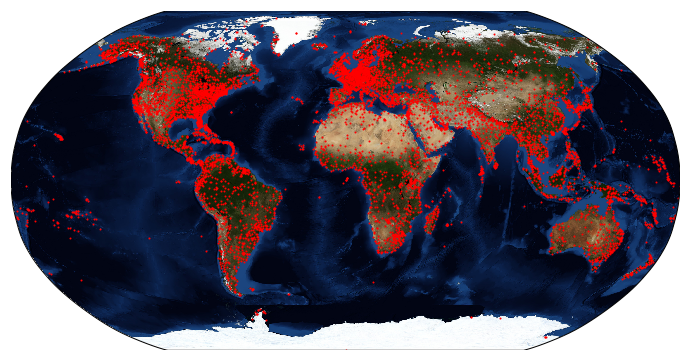

In [0]:
fig = plt.figure(figsize=(12,12))
m = Basemap(projection='robin',
            lon_0=0, lat_0=50, lat_1=20, lat_2=90,
            width=1.6E7, height=1.2E7, resolution='h')
m.bluemarble(scale=0.5);

x, y = m(
   [l[0] for l in airport_coordinates ],
   [l[1] for l in airport_coordinates ])

m.scatter(
       x,
       y,
       1,  marker='o',
       color='red')

In [0]:
import pandas as pd

In [0]:
conn = sqlite3.connect("flight_information.db")
cur = conn.cursor()

airlines= pd.read_sql_query("select * from airlines;", conn)

In [0]:
routes = pd.read_sql_query(""" select cast(so.longitude as float) as s_lon, cast(so.latitude as float) as s_lat, cast (de.longitude as float) as d_lon , cast(de.latitude as float) as d_lat from routes inner join airports so on so.id = routes.source_id  inner join airports de on de.id = routes.dest_id;""", conn)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


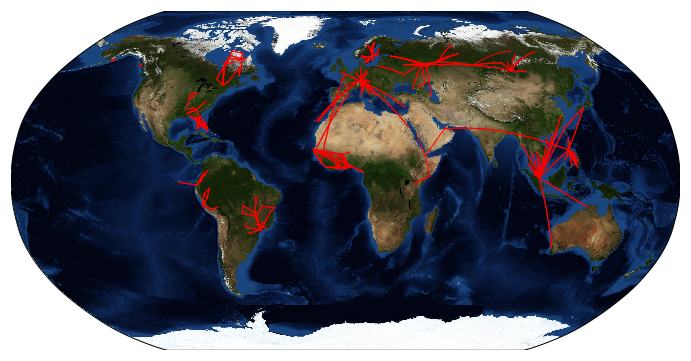

In [0]:
fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='robin',
            lon_0=0, lat_0=50, lat_1=20, lat_2=90,
            width=1.6E7, height=1.2E7, resolution='c')
m.bluemarble(scale=0.5);

for name, row in routes[:500].iterrows():
    if abs(row["s_lon"] - row["d_lon"]) < 90:
        # Draw a great circle between source and dest airports.
        m.drawgreatcircle(
            row["s_lon"],
            row["s_lat"],
            row["d_lon"],
            row["d_lat"],
            linewidth=1,
            color='r'
        )

In [0]:
cur = conn.cursor()
cur.execute("insert into airlines values (6048, 19890, 'Test flight', '', '', null, null, null, 'Y')")
conn.commit()


pd.read_sql_query("select * from airlines where id=19890;", conn)

,index,id,name,alias,iata,icao,callsign,country,active
0,6048,19890,Test flight,,,None,None,None,Y


In [0]:
cur = conn.cursor()
values = ('Germany', 19890)
cur.execute("update airlines set country=? where id=?", values)
conn.commit()


pd.read_sql_query("select * from airlines where id=19890;", conn)

,index,id,name,alias,iata,icao,callsign,country,active
0,6048,19890,Test flight,,,None,None,Germany,Y


In [0]:
cur = conn.cursor()

values = (19890, )
cur.execute("delete from airlines where id=?", values)
conn.commit()

pd.read_sql_query("select * from airlines where id=19890;", conn)
 

,index,id,name,alias,iata,icao,callsign,country,active
